In [1]:
from ucimlrepo import fetch_ucirepo

In [2]:
# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [3]:
# Remove rows with missing values
nan_indexes = X[X.isna().any(axis=1)].index
X = X.drop(nan_indexes)
y = y.drop(nan_indexes)

In [4]:
import jax.numpy as np

# Convert DataFrames to numpy (JAX) arrays
X_arr = np.asarray(X.to_numpy(), dtype=float)
y_arr = np.asarray(y.to_numpy() / 2 - 1.0)

I0000 00:00:1700001813.206832       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [5]:
from NeuralNetwork import NeuralNet
from CostFuncs import (
    CostCrossEntropy_fast,
    CostCrossEntropy_binary,
)
from Activators import sigmoid, RELU, softmax, LRELU, zero_one_clip
from jax import jit
from CostFuncs import CostCrossEntropy_fast, CostCrossEntropy_binary

dimensions = (9, 50, 50, 75, 1)
FFNN = NeuralNet(
    dimensions,
    hidden_func=zero_one_clip,
    output_func=sigmoid,
    seed=2023,
    cost_func=CostCrossEntropy_binary,
)

In [6]:
from Schedules import Adam

from jax.config import config

config.update("jax_debug_nans", True)

scores = FFNN.fit(
    X_arr,
    y_arr,
    epochs=200,
    batches=40,
    scheduler=Adam(0.0001, 0.9, 0.999),
    lmbda=0.0001,
)

100%|██████████| 8000/8000 [00:46<00:00, 170.99it/s]


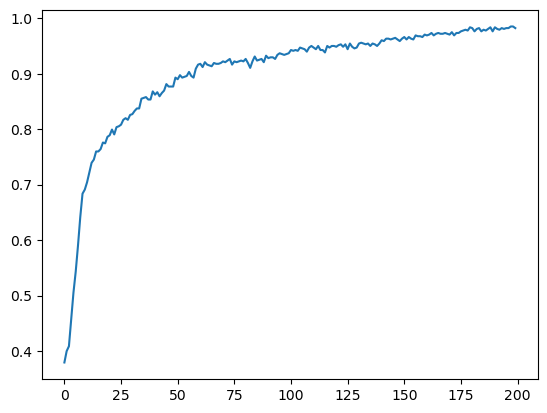

In [7]:
import matplotlib.pyplot as plt

plt.plot(scores["train_accuracy"])

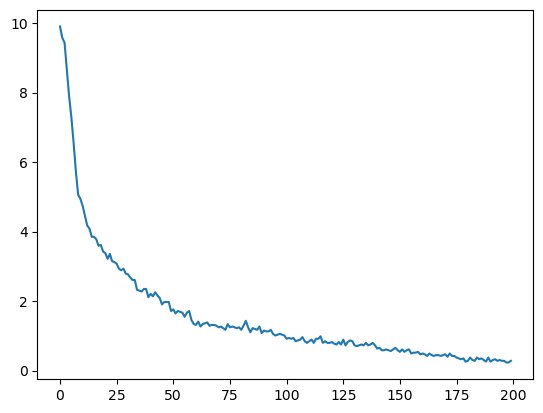

In [8]:
plt.plot(scores["train_errors"])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_arr, y_arr, test_size=0.2)

In [36]:
from NeuralNetwork import NeuralNet
from Activators import sigmoid
from CostFuncs import CostCrossEntropy_binary
from Schedules import Adam, Constant

dimensions = (9, 50, 50, 1)
FFNN = NeuralNet(
    dimensions,
    hidden_func=sigmoid,
    output_func=sigmoid,
    cost_func=CostCrossEntropy_binary,
    seed=2023,
)

scores = FFNN.fit(
    X_train,
    y_train,
    # scheduler=Adam(0.001, 0.9, 0.999),
    scheduler=Constant(0.01),
    batches=20,
    epochs=400,
    lmbda=0.000001,
    X_val=X_test,
    target_val=y_test,
)

100%|██████████| 8000/8000 [00:09<00:00, 844.22it/s]


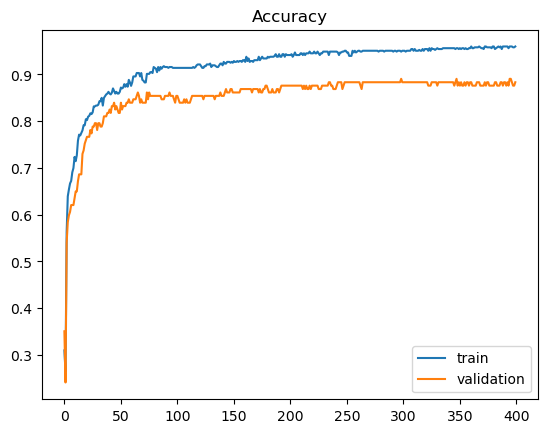

In [37]:
import matplotlib.pyplot as plt

plt.plot(scores["train_accuracy"], label="train")
plt.plot(scores["validation_accuracy"], label="validation")
plt.legend()
plt.title("Accuracy")
plt.show()

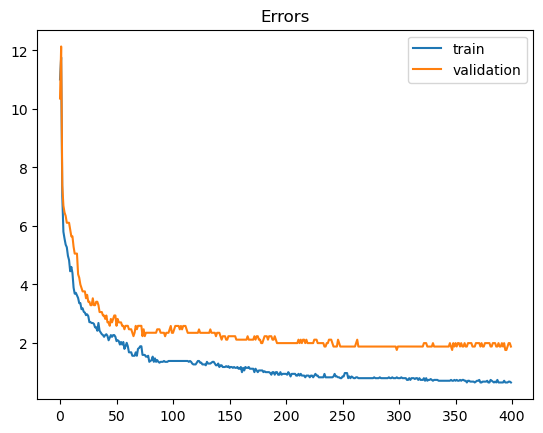

In [38]:
import matplotlib.pyplot as plt

plt.plot(scores["train_errors"], label="train")
plt.plot(scores["validation_errors"], label="validation")
plt.legend()
plt.title("Errors")
plt.show()